## Finding best model and hyper parameter tunning using GridSearchCV

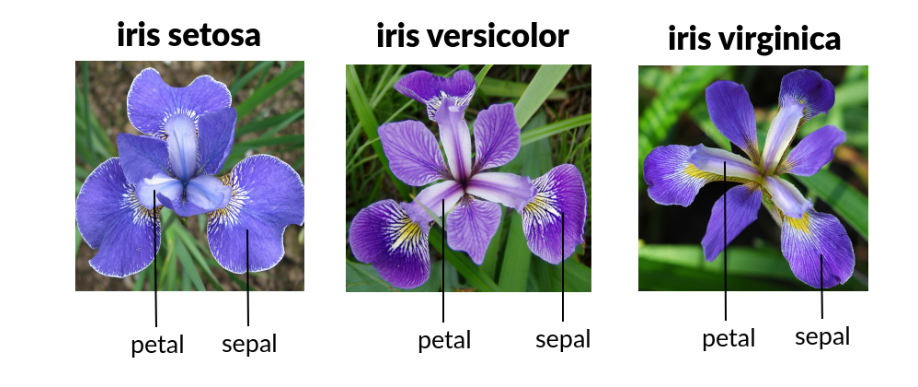

In [2]:
from IPython.display import display, Image
display(Image("iris.png")) 


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import svm, datasets
import pandas as pd


In [23]:
from sklearn.model_selection import RandomizedSearchCV


In [14]:
import numpy as np


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
iris = datasets.load_iris()

In [6]:
df =pd.DataFrame(iris.data,columns=iris.feature_names)
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x:iris.target_names[x])
df[47:150]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Approach 1: Use train_test_split and manually tune parameters by trial and error

In [7]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,train_size=20)

In [8]:
model =svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train,y_train)


SVC(C=30, gamma='auto')

In [9]:
model.score(X_test,y_test)

0.9384615384615385

### Approach 2: Use K Fold Cross validation

In [10]:
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),iris.data,iris.target,cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [11]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma="auto"),iris.data,iris.target,cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [12]:
cross_val_score(svm.SVC(kernel='rbf',C=20,gamma='auto'),iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

### Above approach is tiresome and very manual. We can use for loop as an alternative

In [15]:
kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),iris.data, iris.target, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

{'rbf_1': np.float64(0.9800000000000001),
 'rbf_10': np.float64(0.9800000000000001),
 'rbf_20': np.float64(0.9666666666666668),
 'linear_1': np.float64(0.9800000000000001),
 'linear_10': np.float64(0.9733333333333334),
 'linear_20': np.float64(0.9666666666666666)}

### Approach 3: Use GridSearchCV

#### GridSearchCV does exactly same thing as for loop above but in a single line of code

In [16]:
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)


clf.fit(iris.data, iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00198812, 0.00178747, 0.00198479, 0.00399089, 0.00379014,
        0.00179377]),
 'std_fit_time': array([0.00088568, 0.00131892, 0.00061765, 0.00367791, 0.00324113,
        0.00039788]),
 'mean_score_time': array([0.00140243, 0.00079126, 0.00499201, 0.00119781, 0.00199494,
        0.00119643]),
 'std_score_time': array([0.00048394, 0.00039585, 0.00608084, 0.00040377, 0.00089266,
        0.00039921]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],
 'split0_test_s

In [17]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001988,0.000886,0.001402,0.000484,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.001787,0.001319,0.000791,0.000396,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.001985,0.000618,0.004992,0.006081,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.003991,0.003678,0.001198,0.000404,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.003790,0.003241,0.001995,0.000893,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.001794,0.000398,0.001196,0.000399,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [18]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [19]:
df[['param_C','param_kernel','mean_test_score', "rank_test_score"]]

,param_C,param_kernel,mean_test_score,rank_test_score
0,1,rbf,0.980000,1
1,1,linear,0.980000,1
2,10,rbf,0.980000,1
3,10,linear,0.973333,4
4,20,rbf,0.966667,5
5,20,linear,0.966667,6


In [20]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [21]:
clf.best_score_

np.float64(0.9800000000000001)

In [22]:
dir(clf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_routed_params_for_fit',
 '_get_scorers',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run

In [24]:
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,20,rbf,0.966667
1,1,linear,0.980000


In [25]:
rs.best_estimator_

SVC(C=1, gamma='auto', kernel='linear')

In [26]:
rs.best_params_

{'kernel': 'linear', 'C': 1}

In [27]:
rs.best_score_

np.float64(0.9800000000000001)

#### How about different models with different hyperparameters?

In [29]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [30]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\Users\NooR\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\NooR\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\NooR\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\NooR\AppData\Local\Programs\Python\Python39

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.966667,{'n_estimators': 10}
2,logistic_regression,0.966667,{'C': 5}


In [31]:
def gridsearch(model_params_dict, x, y ):
    scores = []

    for model_name, mp in model_params_dict.items():
        clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
        clf.fit(x, y)
        scores.append({
            'model': model_name,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_
        })

    df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
    return df